In [1]:
import numpy as np
from scipy.stats import ttest_rel
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def read_from_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)

In [2]:
# Extract data, filtering out None values
results = results = read_from_json("results.json")
scores = [
    (result['my'], result['the'], result['dataset'])
    for result in results
    if result['my'] is not None and result['the'] is not None
]
my_vals, the_vals, dataset_vals = zip(*scores)

datasets = set(dataset_vals)
datasets

{'descriptions', 'fables', 'poems'}

In [3]:
# Calculate the differences
differences = np.array(my_vals) - np.array(the_vals)

# Perform paired t-test
t_stat, p_value = ttest_rel(my_vals, the_vals)

# Calculate the mean difference
mean_difference = np.mean(differences)

print(f'"My" mean: {np.mean(my_vals)} ({len(my_vals)} values)')
print(f'"The" mean: {np.mean(the_vals)} ({len(the_vals)} values)')
print(f"Mean difference: {mean_difference}")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

"My" mean: 4.261904761904762 (105 values)
"The" mean: 4.0 (105 values)
Mean difference: 0.2619047619047619
t-statistic: 7.726344199355025
p-value: 7.248588761855158e-12


In [4]:
# Calculate and print mean differences per category
categories = set(datasets)
for category in categories:
    category_scores = [
        (my, the)
        for my, the, dataset in zip(my_vals, the_vals, dataset_vals)
        if dataset == category
    ]
    if category_scores:
        category_my_scores, category_the_scores = zip(*category_scores)
        category_differences = np.array(category_my_scores) - np.array(category_the_scores)
        category_mean_difference = np.mean(category_differences)
        print(f"Category '{category}' Mean Difference: {category_mean_difference}")

Category 'descriptions' Mean Difference: 0.03125
Category 'fables' Mean Difference: 0.1875
Category 'poems' Mean Difference: 0.5757575757575758


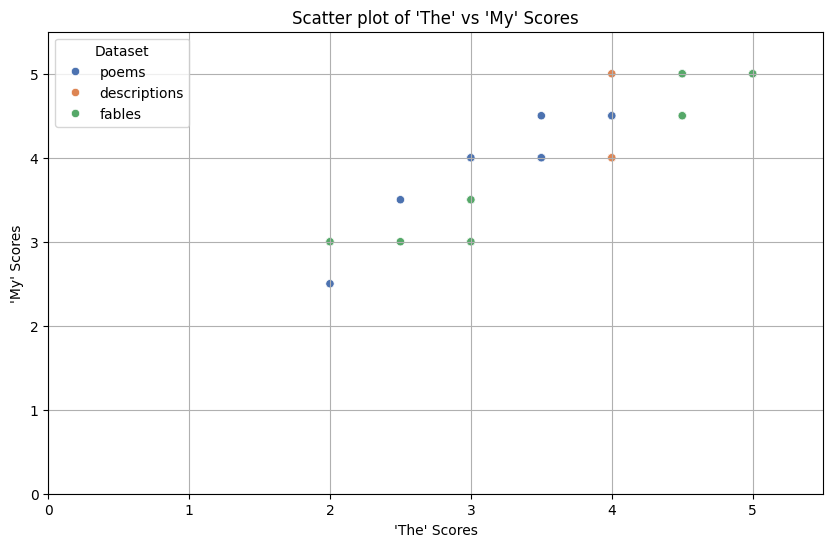

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=the_vals, y=my_vals, hue=dataset_vals, palette="deep")
# plt.plot([min(the_vals), max(the_vals)], [min(the_vals), max(the_vals)], color='gray', linestyle='--')
plt.xlabel("'The' Scores")
plt.ylabel("'My' Scores")
plt.xlim(0, 5.5)
plt.ylim(0, 5.5)
plt.title("Scatter plot of 'The' vs 'My' Scores")
plt.legend(title='Dataset')
plt.grid(True)
plt.show()

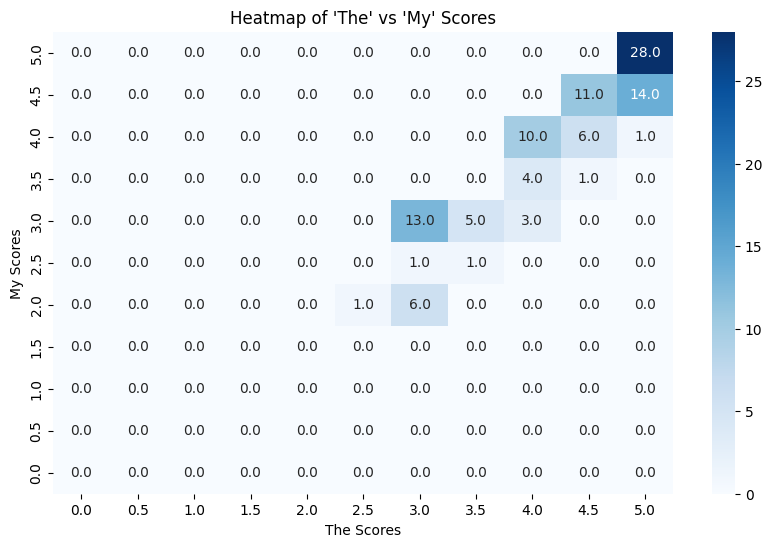

In [6]:
heatmap_data = Counter(zip(the_vals, my_vals))
heatmap_matrix = np.zeros((11, 11))  # Adjusted to cover 0.0 to 5.0

for (the_val, my_val), count in heatmap_data.items():
    heatmap_matrix[int(the_val*2)][int(my_val*2)] = count

plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=[i/2 for i in range(11)], yticklabels=[i/2 for i in range(11)])
plt.xlabel("The Scores")
plt.ylabel("My Scores")
plt.title("Heatmap of 'The' vs 'My' Scores")
ax.invert_yaxis()
plt.show()